# Pregunta 2: Resumen de temas

Se solicita que resumas los principales temas que mencionan los comensales al momento de dejar una reseña (Hint: Sabor, variedad, servicio, etc)

In [2]:
import pandas as pd
import emoji
import string

In [3]:
pd.__version__

'1.1.5'

In [4]:
df1 = pd.read_csv('./data/places_reviews.csv', nrows=9183)

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9183 entries, 0 to 9182
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              9183 non-null   object
 1   reviewer         9183 non-null   object
 2   reviewer_avatar  9183 non-null   object
 3   datetime         9183 non-null   object
 4   rating           9183 non-null   int64 
 5   text             9183 non-null   object
 6   language         9183 non-null   object
 7   id               9183 non-null   object
 8   place_id         9183 non-null   object
dtypes: int64(1), object(8)
memory usage: 645.8+ KB


In [35]:
df1.head()

,url,reviewer,reviewer_avatar,datetime,rating,text,language,id,place_id
0,https://www.google.com/maps/reviews/data=!4m5!...,Josial Iszsa,https://lh3.googleusercontent.com/a-/AOh14GhZ0...,2020-07-30T00:26:00Z,5,"Higiene, medidas de sana distancia, excelente ...",es,17546225955757877359-1596057977.804,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
1,https://www.google.com/maps/reviews/data=!4m5!...,Osvaldo Caballero,https://lh4.googleusercontent.com/-5ebzE6LwgJ4...,2020-07-08T00:18:00Z,5,Buen lugar para comer y pasar el rato,es,17546225955757877359-1594156694.121,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
2,https://www.google.com/maps/reviews/data=!4m5!...,Marbella Miss,https://lh3.googleusercontent.com/a-/AOh14Gjc-...,2020-03-19T07:53:00Z,5,Súper delicioso todo y muy económico 🥰❤️❤️,es,17546225955757877359-1584593609.046,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
3,https://www.google.com/maps/reviews/data=!4m5!...,Erick romero casas,https://lh3.googleusercontent.com/a-/AOh14GjFo...,2020-03-13T00:27:00Z,4,"Muy buen servicio, costos un poco elevados",es,17546225955757877359-1584048420.225,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
4,https://www.google.com/maps/reviews/data=!4m5!...,Yoscelina Gomez,https://lh3.googleusercontent.com/a-/AOh14Gig6...,2020-03-08T03:49:00Z,3,"Comida rica, buen precio, atención normal, la ...",es,17546225955757877359-1583628551.982,ChIJ_6PxIP_-0YURb-iv-Yq3gPM


## Quitamos acentos, emoticons, commas y caracteres especiales

In [41]:
import unicodedata

In [42]:
df1['text'] = df1['text'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [44]:
df2 = df1.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [46]:
df2['text'] = df2['text'].str.lower()

In [47]:
df2['text'] = df2['text'].str.replace('[.,"\'-?:!;]','')

In [48]:
df2.head(3)

,url,reviewer,reviewer_avatar,datetime,rating,text,language,id,place_id
0,https://www.google.com/maps/reviews/data=!4m5!...,Josial Iszsa,https://lh3.googleusercontent.com/a-/AOh14GhZ0...,2020-07-30T00:26:00Z,5,higiene medidas de sana distancia excelente ca...,es,17546225955757877359-1596057977.804,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
1,https://www.google.com/maps/reviews/data=!4m5!...,Osvaldo Caballero,https://lh4.googleusercontent.com/-5ebzE6LwgJ4...,2020-07-08T00:18:00Z,5,buen lugar para comer y pasar el rato,es,17546225955757877359-1594156694.121,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
2,https://www.google.com/maps/reviews/data=!4m5!...,Marbella Miss,https://lh3.googleusercontent.com/a-/AOh14Gjc-...,2020-03-19T07:53:00Z,5,super delicioso todo y muy economico,es,17546225955757877359-1584593609.046,ChIJ_6PxIP_-0YURb-iv-Yq3gPM


## WordCloud

In [90]:
from wordcloud import WordCloud, STOPWORDS
import nltk
import matplotlib.pyplot as plt
import matplotlib
%config InlineBackend.figure_format = "retina"

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords

In [72]:
stop_words_1 = set(stopwords.words('spanish'))
stop_words_2 = set(stopwords.words('english'))
stop_words = stop_words_1 | stop_words_2

In [16]:
from nltk import tokenize

In [21]:
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None

In [94]:
def wordcloud(tweets,col):
    wordcloud = WordCloud(background_color='white',stopwords=stop_words,random_state=2022).generate(" ".join([i for i in tweets[col]]))
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud)
    plt.axis("off")

## Creamos una word cloud para cada rating

In [64]:
df2.groupby('rating_num').size()

rating_num
1     223
2     181
3     493
4    1565
5    6721
dtype: int64

In [60]:
df2['rating_num'] = df2['rating'].astype(int)

### Rating con 4 y 5

(8286, 10)


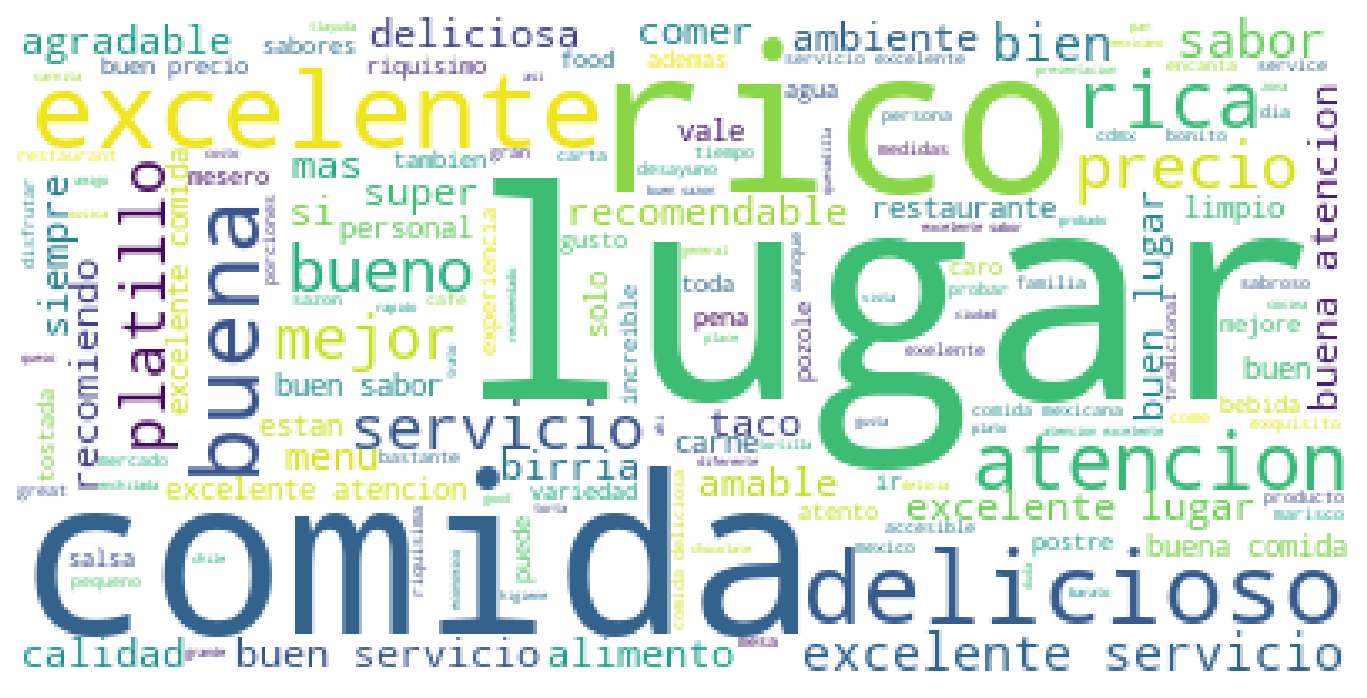

In [102]:
df3 = df2[df2['rating_num'].isin([4,5])]
print(df3.shape)
wordcloud(df3,'text')

### Rating = 3

(493, 10)


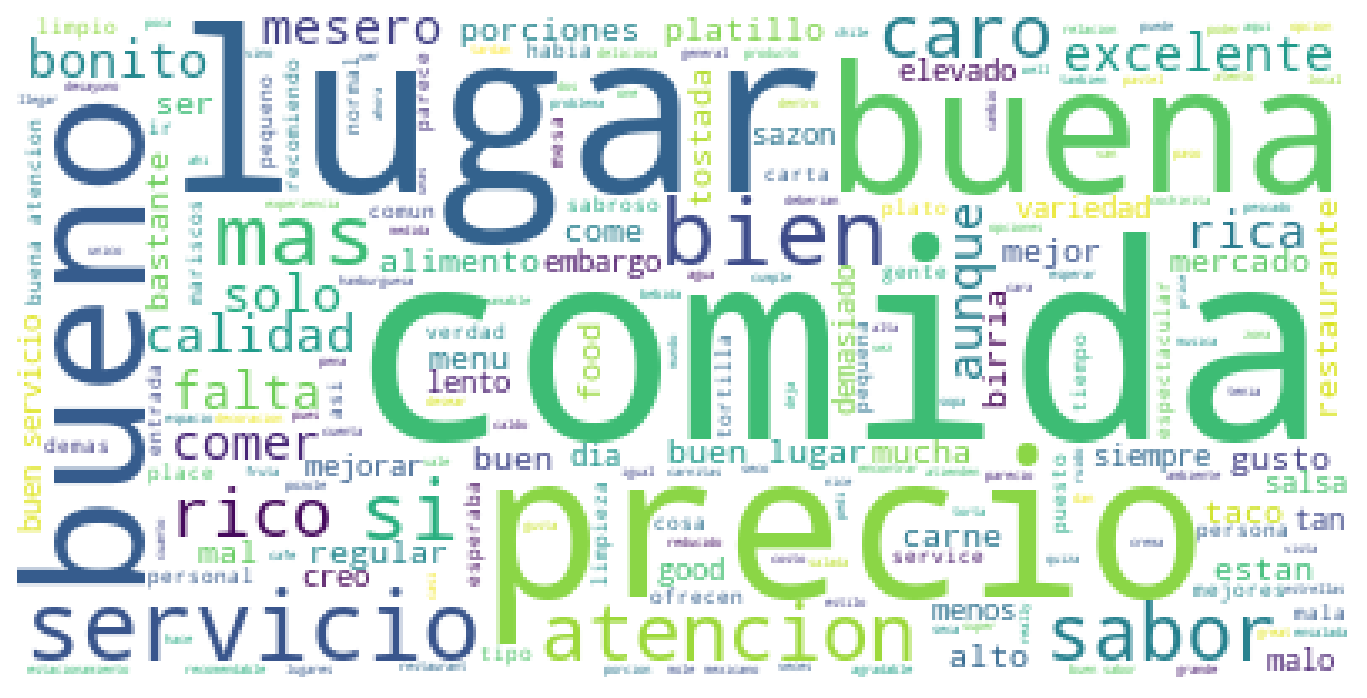

In [103]:
df3 = df2[df2['rating_num']==3]
print(df3.shape)
wordcloud(df3,'text')

### Rating con 1 y 2

(404, 10)


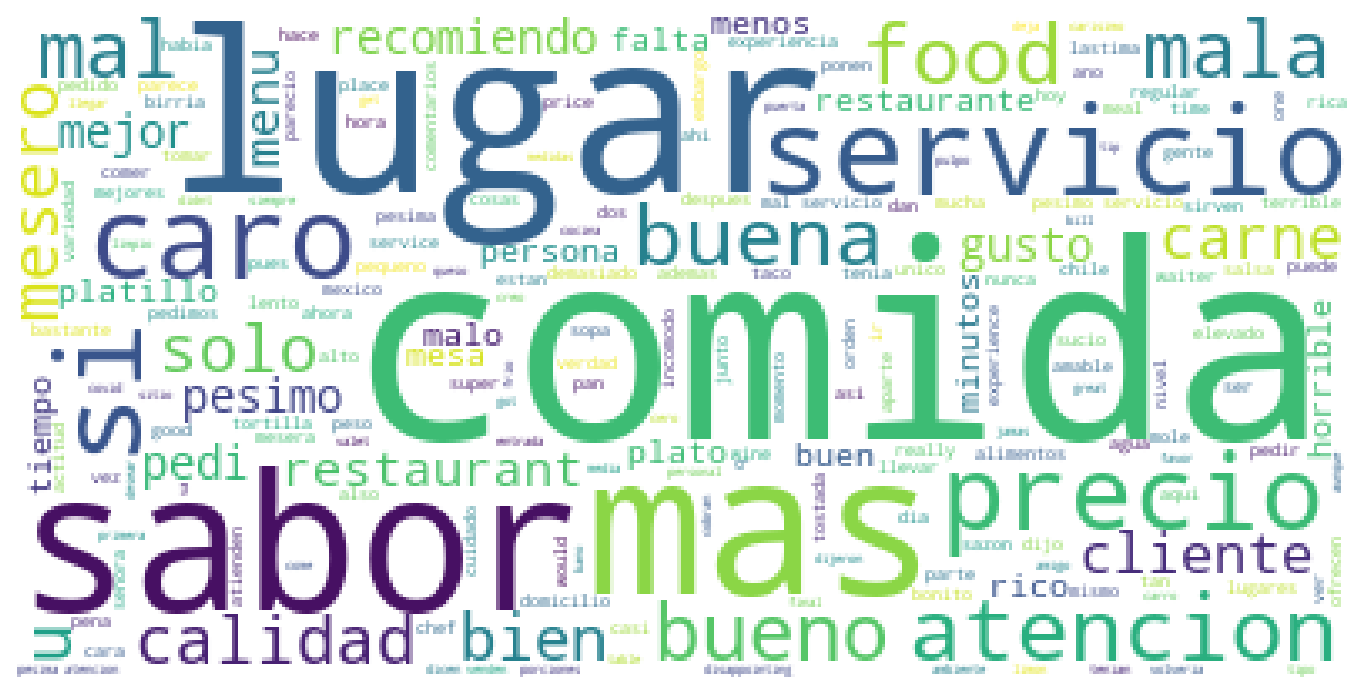

In [104]:
df3 = df2[df2['rating_num'].isin([1,2])]
print(df3.shape)
wordcloud(df3,'text')

## Conclusiones

Entre los rating 4 y 5, los temas más relevantes son:
- Excelente lugar
- Comida deliciosa
- Buen servicio

A partir del rating 3, ya empieza a aparacer como tema relevante:
- Precio
- Un buen lugar pero caro
- Buen servicio
   
Para los ratings 1 y 2, los temas relevantes son:
- El precio
- Mala comida

# Pregunta 3

## Resumir una gran experiencia laboral

Durante mi estancia en BBVA, nos percatamos que cada científico de datos tenia sus propios métodos para analizar a los clientes, para desarrollar análisis de segmentación y también para calcular un modelo score, por lo que mi colega Samuel Rocha y un servidor utilizamos las mejores prácticas de todos los científicos de datos y los concentramos en un **paquete de R**. Por lo tanto, en ese paquete ya venían las funciones estandarizadas y se tenía un control sobre las funciones.

<center><img src="./images/paquete_r.png" width="450"></center>


Este paquete estaba enfocado a resolver las necesidades que tenemos para crear un modelo score, éstas son:
- Definicion de universo y variables iniciales
- Analisis de segmentacion
- Tratamiento de datos
- Depuracion de los datos
- Estimacion de los modelos 1ra parte
- Estimacion de los modelos 2da parte
- Métodos para situaciones especificas
- Validación, ajustes y tarjeta de puntuación

Tener paquetes institucionales tiene varios beneficios:
- Control en los procesos de estimación
- Control de versiones
- Eficiencia en los procesos de estimación
- Funciones adecuadamente documentadas
- Claridad en la entra y salida de cada uno de los procedimientos de análisis

El reto que enfrentamos posterior a la creación de esta versión, es migrarla a un lenguaje de priogramación con mayor potencia de procesamiento, al día de hoy, estamos en el desarrollo de propuestas para la creaciñon de una librería en `Python` y `Spark`.